In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Model class that inherits nn.Module

In [2]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=8, out_features=3):
        super().__init__() # initialize the parent class -> nn.Module
        self.fc1 = nn.Linear(in_features, h1) # fully connected nn 1
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [3]:
torch.manual_seed(0) # set the seed for random number generation

model = Model() # create an instance of the model
print(model) # print the model architecture

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)


In [4]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
df['species'] = df['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})
df

C:\Users\bilbo\AppData\Local\Temp\ipykernel_27404\3189002044.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
X = df.drop('species', axis=1)
y = df['species']

# Create numpy arrays from the DataFrame
X = X.values 
y = y.values

X.shape, y.shape, X

((150, 4),
 (150,),
 array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [8]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train) # integer tensor for classification
y_test = torch.LongTensor(y_test)

In [9]:
criterion = nn.CrossEntropyLoss() # loss function for multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # optimizer for training

In [10]:
# epoch -> one iteration over the entire training dataset
epochs = 200
losses = [] # to store the loss values for plotting
for i in range(epochs):

    # forward pass to get an prediction
    y_pred = model.forward(X_train) # prediction of the model

    # calculate the loss
    loss = criterion(y_pred, y_train) # compare prediction with the actual labels
    losses.append(loss.detach().numpy()) # keep track of the loss value

    if i % 10 == 0:
        print(f'Epoch {i} loss: {loss}')

    # backward pass to calculate the gradients and tune the weights
    optimizer.zero_grad() # clear the gradients from the previous step

    loss.backward() # calculate the gradients
    optimizer.step() # update the weights based on the gradients



Epoch 0 loss: 1.1124722957611084
Epoch 10 loss: 0.9464680552482605
Epoch 20 loss: 0.7165138125419617
Epoch 30 loss: 0.5139971971511841
Epoch 40 loss: 0.4129088819026947
Epoch 50 loss: 0.3527112901210785
Epoch 60 loss: 0.2815325856208801
Epoch 70 loss: 0.20217926800251007
Epoch 80 loss: 0.13878396153450012
Epoch 90 loss: 0.09734998643398285
Epoch 100 loss: 0.07327727228403091
Epoch 110 loss: 0.05918116867542267
Epoch 120 loss: 0.05035590007901192
Epoch 130 loss: 0.04435957968235016
Epoch 140 loss: 0.03999583423137665
Epoch 150 loss: 0.0366409532725811
Epoch 160 loss: 0.0339556448161602
Epoch 170 loss: 0.03174035623669624
Epoch 180 loss: 0.029870573431253433
Epoch 190 loss: 0.02826397493481636


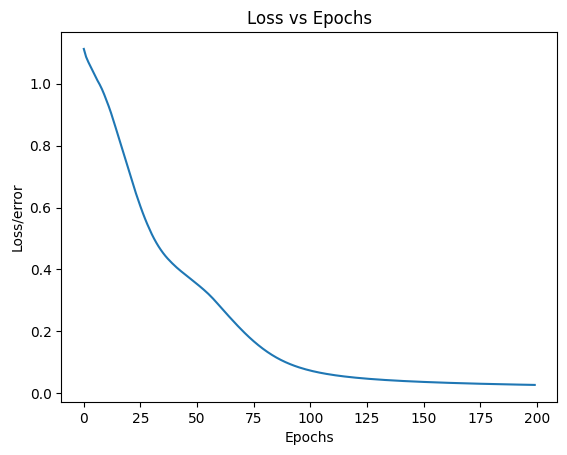

In [11]:
plt.plot(range(epochs), losses) # plot the loss values
plt.xlabel('Epochs')
plt.ylabel('Loss/error')
plt.title('Loss vs Epochs')
plt.show()

If we wont see the flattening in the plot, we need to lower the learning rate or increase the number of epochs

In [12]:
# evaluate the model on the test set (y_pred)
with torch.no_grad(): # turn off gradients for evaluation -> saves memory
    y_pred = model.forward(X_test) # get the predictions
    loss = criterion(y_pred, y_test) # calculate the loss

In [13]:
loss

tensor(0.1465)

In [21]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data) # get the prediction for each data point

        # print(f'Predicted: {torch.argmax(y_val)}, Actual: {y_test[i]}')
        if torch.argmax(y_val) == y_test[i]:
            correct += 1
print(f'Accuracy: {correct/len(X_test)}, corrected classified: {correct} out of {len(y_test)}') # calculate the accuracy

Accuracy: 0.9333333333333333, corrected classified: 28 out of 30


In [22]:
new_iris = torch.tensor([[4.7, 3.2, 1.3, 0.2]]) # new data point

In [23]:
with torch.no_grad():
    print(model(new_iris))

tensor([[ 15.1332,   7.1301, -27.5081]])


In [24]:
# save the model
torch.save(model.state_dict(), 'iris_model.pth') # save the model parameters to a file

In [25]:
# load the model
new_model = Model() # create a new instance of the model
new_model.load_state_dict(torch.load('iris_model.pth')) # load the saved parameters

<All keys matched successfully>

In [27]:
new_model.eval() # double check the model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)